In [ ]:
# https://developers.google.com/optimization/introduction/python

In [1]:
# Define four parallel arrays: start_nodes, end_nodes, capacities, and unit costs
# between each pair. For instance, the arc from node 0 to node 1 has a
# capacity of 15 and a unit cost of 4.

start_nodes = [ 0, 0,  1, 1,  1,  2, 2,  3, 4]
end_nodes   = [ 1, 2,  2, 3,  4,  3, 4,  4, 2]
unit_costs  = [ 4, 4,  2, 2,  6,  1, 3,  2, 3]
capacities  = [15, 8, 20, 4, 10, 15, 4, 20, 5]
flows       = [ 0, 0,  0, 0,  0,  0, 0,  0, 0]

# Define an array of supplies at each node.
supplies = [20, 0, 0, -5, -15]

In [2]:
def plot_graph(supplies, start_nodes, end_nodes, unit_costs, capacities, flows):
    import networkx as nx
    import matplotlib.pyplot as plt

    G = nx.DiGraph()
    for x,y,z,c,f in zip(start_nodes, end_nodes, unit_costs, capacities, flows):
        G.add_edge(x, y, cost=z, capacity=c, flow=f)

    labeldict = {}
    for i,s in enumerate(supplies):
        labeldict[i] = s

    plt.figure(figsize=(14,10))
    pos=nx.circular_layout(G)
    nx.draw_networkx(G,pos,labels=labeldict, with_labels=True, 
                     arrowsize=20, font_size=15, node_color="yellow")
    nx.draw_networkx_edge_labels(G,pos)
    plt.show()

In [3]:
plot_graph(supplies, start_nodes, end_nodes, unit_costs, capacities, flows)

<Figure size 1400x1000 with 1 Axes>

In [4]:
from ortools.graph import pywrapgraph

"""MinCostFlow simple interface example."""

# Instantiate a SimpleMinCostFlow solver.
min_cost_flow = pywrapgraph.SimpleMinCostFlow()

# Add each arc.
for i in range(0, len(start_nodes)):
    min_cost_flow.AddArcWithCapacityAndUnitCost(start_nodes[i], end_nodes[i],
                                                capacities[i], unit_costs[i])

# Add node supplies.
for i in range(0, len(supplies)):
    min_cost_flow.SetNodeSupply(i, supplies[i])


# Find the minimum cost flow between node 0 and node 4.
if min_cost_flow.Solve() == min_cost_flow.OPTIMAL:
    print('Minimum cost:', min_cost_flow.OptimalCost())
    print('')
    print('  Arc    Flow / Capacity  Cost')
    for i in range(min_cost_flow.NumArcs()):
        cost = min_cost_flow.Flow(i) * min_cost_flow.UnitCost(i)
        print('%1s -> %1s   %3s  / %3s       %3s' % (
          min_cost_flow.Tail(i),
          min_cost_flow.Head(i),
          min_cost_flow.Flow(i),
          min_cost_flow.Capacity(i),
          cost))
else:
    print('There was an issue with the min cost flow input.')

Minimum cost: 150

  Arc    Flow / Capacity  Cost
0 -> 1    12  /  15        48
0 -> 2     8  /   8        32
1 -> 2     8  /  20        16
1 -> 3     4  /   4         8
1 -> 4     0  /  10         0
2 -> 3    12  /  15        12
2 -> 4     4  /   4        12
3 -> 4    11  /  20        22
4 -> 2     0  /   5         0


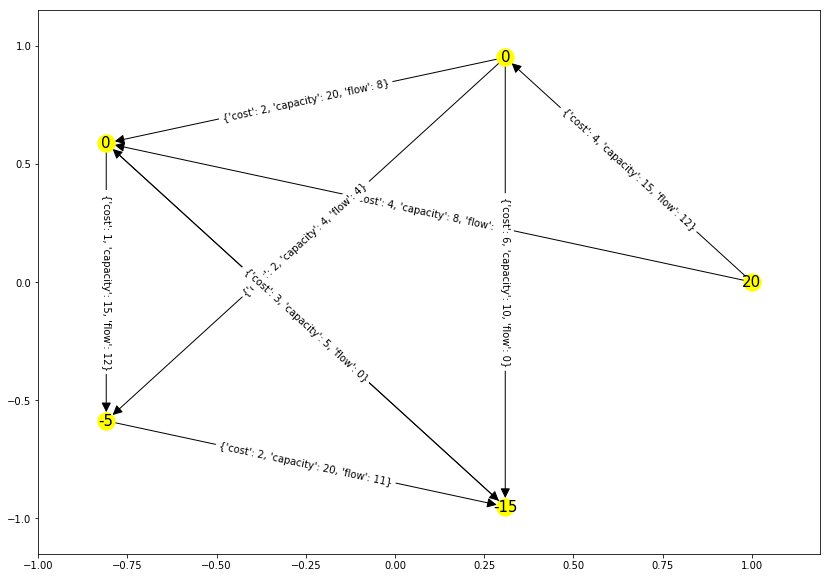

In [5]:
flows = [min_cost_flow.Flow(i) for i,_ in enumerate(capacities)]
plot_graph(supplies, start_nodes, end_nodes, unit_costs, capacities, flows)